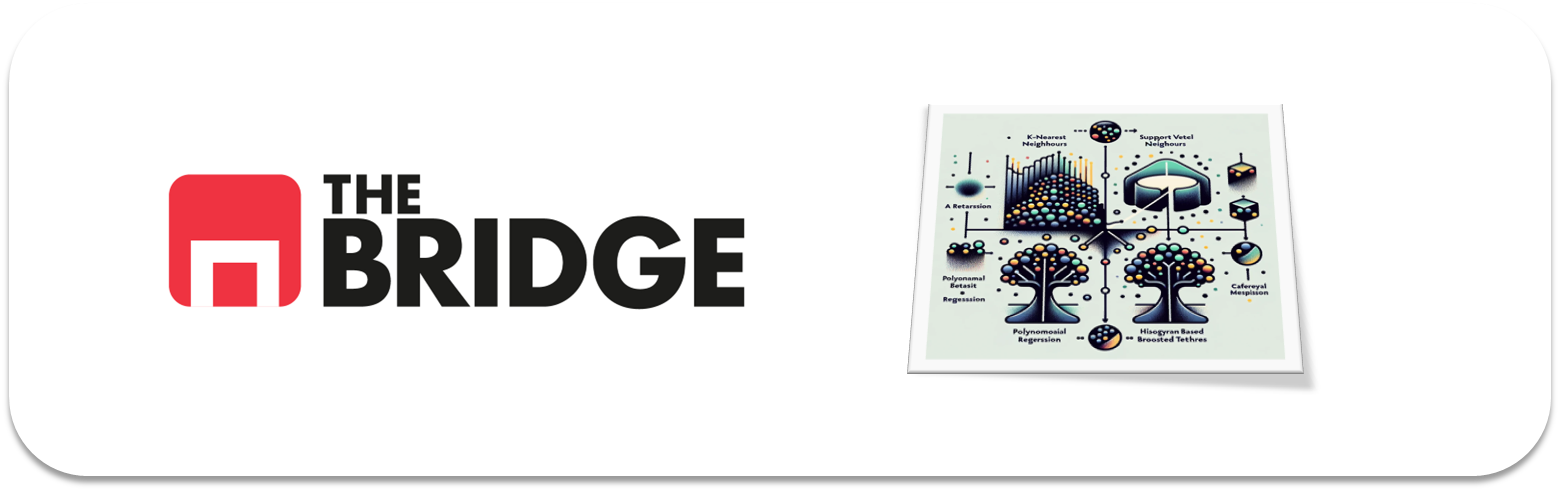

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, make_scorer,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [4]:
df = pd.read_csv("/Users/patri/Desktop/DS24/ONLINE_DS_THEBRIDGE_PGF/SPRINT_12/UNIDAD_2/practica_obligatoria/wines_dataset.csv", delimiter="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Definición de los targets:
 - Target para Clasificación: "quality" (calidad del vino) 
 - Target para Regresión: "alcohol" (El porcentaje de contenido de alcohol del vino.)

In [9]:
target_class = df["quality"]
target_reg = df["alcohol"]

/var/folders/46/4pls5kd120s1rjzy1grzk0vw0000gn/T/ipykernel_40446/1007285848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_class, palette="viridis")


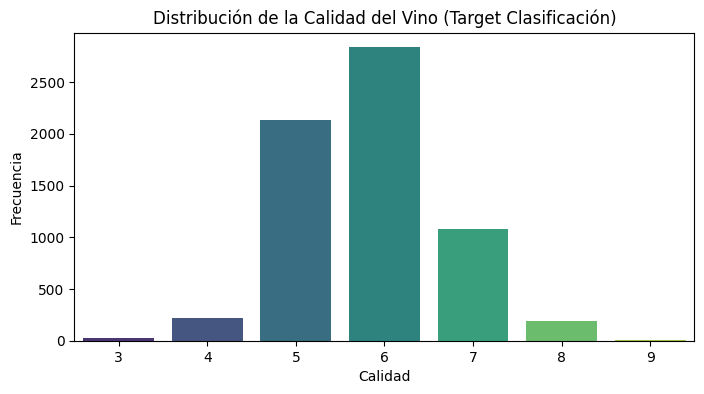

In [11]:
# Visualización de la distribución del target para clasificación (quality)
plt.figure(figsize=(8, 4))
sns.countplot(x=target_class, palette="viridis")
plt.title("Distribución de la Calidad del Vino (Target Clasificación)")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show();

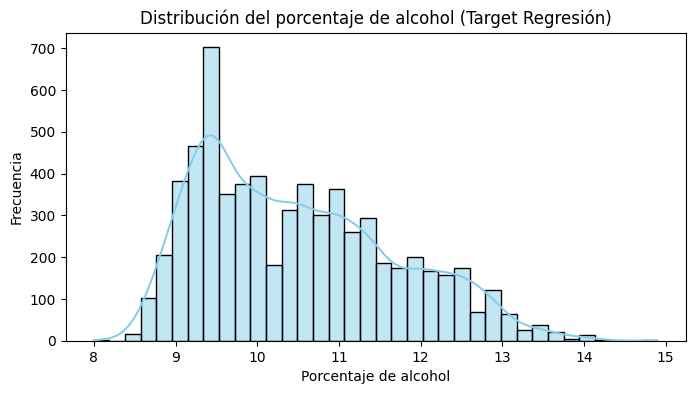

In [12]:
# Visualización de la distribución del target para regresión (alcohol)
plt.figure(figsize=(8, 4))
sns.histplot(target_reg, kde=True, color='skyblue')
plt.title("Distribución del porcentaje de alcohol (Target Regresión)")
plt.xlabel("Porcentaje de alcohol")
plt.ylabel("Frecuencia")
plt.show()

### Assessment
- En el problema de clasificación, se busca maximizar el recall (minimizar falsos negativos) para apoyar decisiones estratégicas sobre producción y precios.
- En el problema de regresión, se pretende minimizar el error porcentual para simular con precisión el porcentaje de alchool de vinos futuros.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [21]:
class_target = "quality"

# convertir a categorica, ya que se califica del 0 al 10
df[class_target] = df[class_target].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
 12  class                 6497 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 615.9+ KB


In [27]:
# features y target
X = df.drop(class_target, axis=1)
y = df[class_target]

In [33]:
#transformar la variable class en númerica
X_num = pd.get_dummies(X, columns=["class"], drop_first=True)

In [34]:
#Train y test
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42, stratify=y)



In [35]:
#Escalado 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

/var/folders/46/4pls5kd120s1rjzy1grzk0vw0000gn/T/ipykernel_40446/2881920334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


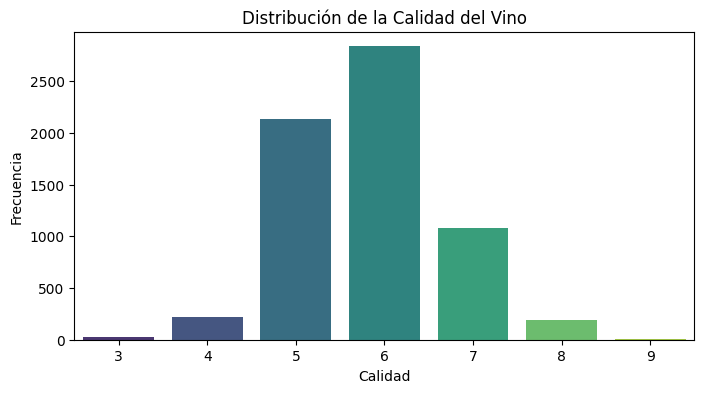

In [36]:
# 6. Visualización
plt.figure(figsize=(8, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show();

In [62]:
#Definir y evaluar los modelos
recall_macro = make_scorer(lambda y_true, y_pred: recall_score(y_true, y_pred, average="macro"))

In [63]:
# Modelos: KNN, Logistic Regression, Random Forest
# KNN: probamos con K=3 y K=5 
models = {
    "KNN_K3": KNeighborsClassifier(n_neighbors=3),
    "KNN_K5": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42)
}


In [66]:
# VC con 5 folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #cambiamos a 3 porque con 5 nos daba el siguiente error: "The least populated class in y has only 4 members, which is less than n_splits=5."

In [67]:
results = {}
print("\nEvaluación de modelos con validación cruzada (scoring: recall macro):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, scoring=recall_macro, cv=cv)
    results[name] = scores.mean()
    print(f"{name}: Recall promedio = {scores.mean():.5f}")


Evaluación de modelos con validación cruzada (scoring: recall macro):
KNN_K3: Recall promedio = 0.28227
KNN_K5: Recall promedio = 0.25926
LogisticRegression: Recall promedio = 0.22105
RandomForest: Recall promedio = 0.33187


Los valores de recall macro son bajo. El modelo RandomForest obtiene el mayor recall macro, lo que, pese al desbalance entre clases, RandomForest está capturando algo mejor las clases en comparación con los otros modelos.

In [68]:
# el grid de hiperparámetros para RandomForest
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [69]:
# StratifiedKFold con 3 folds para la optimización
cv_3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              scoring="recall_macro",
                              cv=cv_3,
                              n_jobs=-1)

grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='recall_macro')

In [70]:
print(grid_search_rf.best_params_)
print(f"Mejor recall macro en validación (GridSearchCV): {grid_search_rf.best_score_:.5f}")

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor recall macro en validación (GridSearchCV): 0.33788


In [72]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=20, random_state=42)

In [76]:
# Predicción del conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)

test_recall_macro = recall_score(y_test, y_pred, average="macro")
print(f"\nRecall macro en el conjunto de prueba: {test_recall_macro:.5f}\n")

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Recall macro en el conjunto de prueba: 0.35753

Informe de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.09      0.16        43
           5       0.73      0.75      0.74       428
           6       0.66      0.78      0.71       567
           7       0.70      0.55      0.62       216
           8       1.00      0.33      0.50        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.54      0.36      0.39      1300
weighted avg       0.69      0.69      0.68      1300



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

El informe muestra que, aunque el modelo predice razonablemente bien las clases intermedias (por ejemplo, 5 y 6), falla prácticamente en las clases con muy pocos ejemplos (como las clases 3 y 9, y en menor medida la 4 y 8).

- Clases con muy baja representación:
    - Clase 3 (support=6) y clase 9 (support=1) tienen recall 0, lo que indica que el modelo no identifica ninguno  de los vinos en estas categorías.
    - Clase 4 (support=43) tiene un recall de 0.09 y la clase 8 (support=39) 0.33.

- Clases intermedias:
    - Las clases 5 y 6 tienen recall relativamente alto (0.75 y 0.78, respectivamente), lo que sugiere que el modelo funciona mejor en las categorías con mayor número de ejemplos.

Por lo tanto, el recall macro, que promedia el recall de todas las clases, es bajo (0.35753) porque las clases con muy pocos ejemplos afectan fuertemente este promedio.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [78]:
reg_target = "alcohol"
X = df.drop(reg_target, axis=1)
y = df[reg_target]


In [84]:
# convertir class y quality a númerica

if "class" in X.columns:
    X = pd.get_dummies(X, columns=['class'], drop_first=True)

if X["quality"].dtype.name == "category" or X["quality"].dtype == object:
    # Suponiendo que los valores son numéricos, podemos extraer los códigos o convertir directamente
    X["quality"] = pd.to_numeric(X["quality"], errors='coerce')

print(X.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
quality                   int64
class_white                bool
dtype: object


In [85]:
#train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Escalado de las features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [87]:
# Definimos la metrica de evaluación: MAPE
scoring_mape = "neg_mean_absolute_percentage_error"

In [90]:
# Utilizamos KFold para regresión
cv = KFold(n_splits=3, shuffle=True, random_state=42)

In [93]:
# Definir modelos:
models_reg = {
    'KNN_K3': KNeighborsRegressor(n_neighbors=3),
    'KNN_K5': KNeighborsRegressor(n_neighbors=5),
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

In [94]:
results_reg = {}
print("\nEvaluación de modelos con validación cruzada (scoring: neg_MAPE):")
for name, model in models_reg.items():
    scores = cross_val_score(model, X_train_scaled, y_train, scoring=scoring_mape, cv=cv)
    # Dado que el scoring es negativo, tomamos el valor absoluto para interpretarlo
    mape_mean = -scores.mean()
    results_reg[name] = mape_mean
    print(f"{name}: MAPE promedio = {mape_mean:.4f}")


Evaluación de modelos con validación cruzada (scoring: neg_MAPE):
KNN_K3: MAPE promedio = 0.0421
KNN_K5: MAPE promedio = 0.0423
LinearRegression: MAPE promedio = 0.0337
RandomForest: MAPE promedio = 0.0280


In [98]:
# Optimización de hiperparámetros para RandomForest
param_grid_rf_reg = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

cv_reg = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search_rf_reg = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf_reg,
    scoring="neg_mean_absolute_percentage_error",
    cv=cv_reg,
    n_jobs=-1
)

In [99]:
# Ajustar GridSearchCV en el conjunto de entrenamiento escalado
grid_search_rf_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_percentage_error')

In [115]:
print(grid_search_rf_reg.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [116]:
# Mejor MAPE 
best_mape = -grid_search_rf_reg.best_score_ # lo pasamos a positivo
print(f"Mejor MAPE en validación (GridSearchCV): {best_mape:.5f}")

Mejor MAPE en validación (GridSearchCV): 0.02792


In [117]:
# Seleccionar el mejor modelo optimizado
best_rf_reg = grid_search_rf_reg.best_estimator_
best_rf_reg

RandomForestRegressor(n_estimators=300, random_state=42)

In [118]:
#predicción del conjunto de prueba
y_pred_reg = best_rf_reg.predict(X_test_scaled)
y_pred_reg

array([ 9.82116667, 12.34004444, 12.26505556, ..., 11.967     ,
       10.9055    ,  9.34566667])

In [119]:
# Calcular métricas de evaluación del conjunto de prueba
mape_test = mean_absolute_percentage_error(y_test, y_pred_reg)
mae_test = mean_absolute_error(y_test, y_pred_reg)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_reg))

In [121]:
print("\nEvaluación del modelo en el conjunto de prueba:")
print(f"MAPE: {mape_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")


Evaluación del modelo en el conjunto de prueba:
MAPE: 0.0248
MAE: 0.2622
RMSE: 0.4009


 Estos resultados sugieren que el modelo optimizado (RandomForestRegressor) logra predecir el porcentaje de alcohol de los vinos con un error muy reducido, lo que es muy favorable para el objetivo de negocio

In [126]:
#Analisis de errores
residuos = y_test - y_pred_reg

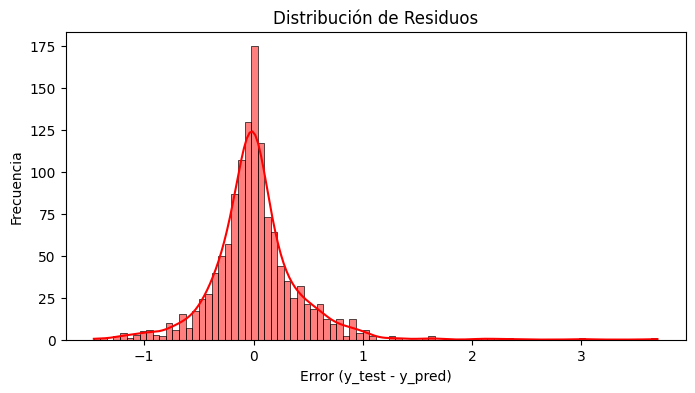

In [129]:
# Histograma de residuos
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, color="red")
plt.title("Distribución de Residuos")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frecuencia")
plt.show()

- La mayor concentración de residuos está cerca de 0:
Esto indica que la mayoría de las predicciones están muy próximas al valor real, lo que confirma el buen desempeño del modelo.
- Distribución simétrica:
La forma de la curva es cercana a una distribución normal centrada en 0, lo cual sugiere que no hay un sesgo sistemático importante, es decir, el modelo no tiende a sobrestimar o el porcentaje de alcohol.
- Pequeña dispersión de los valores:
Aunque hay residuos negativos y positivos, la mayoría se concentra en un rango relativamente estrecho alrededor de 0. Esto coincide con el bajo MAE y RMSE, indicando un error de predicción bastante reducido.

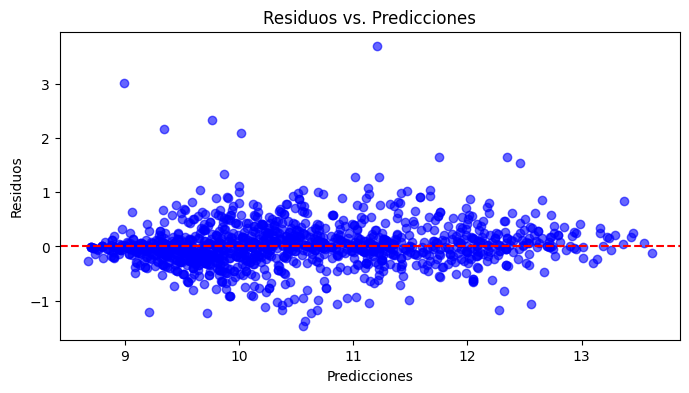

In [131]:
# Gráfico de dispersión de residuos vs. predicciones
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_reg, residuos, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predicciones")
plt.show()

- Concentración alrededor de la línea de cero:
La mayoría de los puntos se encuentran cerca de la línea horizontal roja (residuo = 0), lo que indica que para la mayoría de los vinos, la diferencia entre el valor real de alcohol y la predicción es pequeña.